In [48]:
import os
print(os.getcwd())
#os.chdir("CSV bestanden")
#os.chdir("EindprojThermAdPeMa")
os.path.dirname("EindprojThermAdPeMa/Metingen/CSV bestanden")



import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

c:\Users\DELL\Documents\GitHub\EindprojThermAdPeMa\Metingen\CSV bestanden


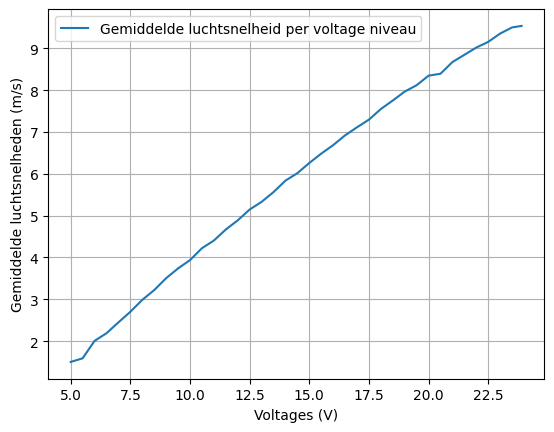

In [58]:
import pandas as pd
import glob
import numpy as np

# Dictionary: voltage -> gekozen wind-snelheid
voltage_wind_value = {}

for file in glob.glob("v_wind *V.csv"):
    # Voltage uit bestandsnaam halen
    voltage = float(
        os.path.basename(file)
        .replace("v_wind ", "")
        .replace("V.csv", "")
    )

    # CSV inlezen
    df = pd.read_csv(file, usecols=[0,1,2], engine="python", on_bad_lines="skip")
    df.columns = ["Date/Time", "Temperature_F", "Wind_fpm"]

    # Numeriek maken (NaNs ontstaan hier)
    df["Wind_fpm"] = pd.to_numeric(df["Wind_fpm"], errors="coerce")

    # Zoek index van eerste NaN
    nan_idx = df["Wind_fpm"].isna().idxmax() if df["Wind_fpm"].isna().any() else len(df)

    # Pak het element twee voor de NaN
    if nan_idx >= 2:
        value = df["Wind_fpm"].iloc[nan_idx - 2]
        voltage_wind_value[voltage] = value
    else:
        voltage_wind_value[voltage] = None  # Te weinig waarden

Voltages = []
Speeds_fpm = []
for v, val in voltage_wind_value.items():
    Voltages += [v]
    Speeds_fpm += [val]

Voltages = np.sort(Voltages)
Speeds_fpm = np.sort(Speeds_fpm)

Speeds = Speeds_fpm*(0.3048 / 60)    #Omzetten naar m/s


plt.figure()
plt.grid()
plt.xlabel('Voltages (V)')
plt.ylabel('Gemiddelde luchtsnelheden (m/s)')
plt.plot(Voltages, Speeds, label='Gemiddelde luchtsnelheid per voltage niveau')
plt.legend()
plt.show()



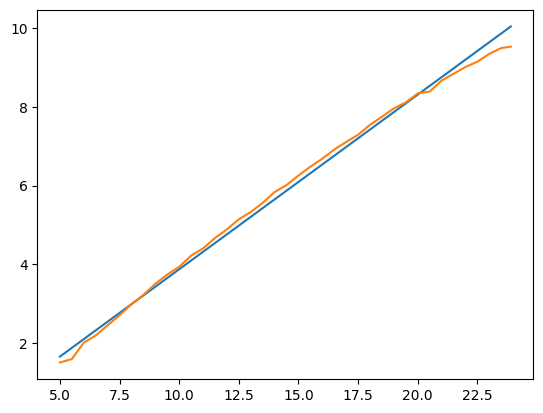

richtingscoefficient =  0.44 m/Vs
minimale snelheid =  1.65 m/s bij 5V
minimale spanning = 5V ten gevolge van drempelspanning van de ventilator


In [57]:
def VS_function(V, a, b):
    return a*V + b

val, cov = curve_fit(VS_function, Voltages, Speeds, sigma= (0.2 + 0.02*Speeds))

plt.figure()
plt.plot(Voltages, val[0]*Voltages + val[1])
plt.plot(Voltages, Speeds)
plt.show()



print('richtingscoefficient = ', f"{val[0]:.2f}", 'm/Vs')
print('minimale snelheid = ', f"{(val[0]*5 + val[1]):.2f}", 'm/s bij 5V')
print('minimale spanning = 5V ten gevolge van drempelspanning van de ventilator')